## Special Projects and Quantum Industry 
### Feedback-stabilization of an Arbitrary Pure State of a Two-Level Atom
Link to paper : https://arxiv.org/pdf/quant-ph/0008003.pdf \
Implementation by Srivathsan S

In [7]:
#Cell containing all imports

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
plt.style.use('dark_background')

##### Figure 2
The stationary solution of the master equation is given by:
$$
x_{ss} = \frac{-4\alpha\gamma}{\gamma^2 + 8\alpha^2} \hspace{10 bp} , \hspace{10 bp} z_{ss} = \frac{-\gamma^2}{\gamma^2 + 8\alpha^2} \hspace{10 bp} , \hspace{10 bp} y_{ss} = 0
$$

This can be simplified to the x-z plane using:
$$
x_{ss} = \frac{-4(\frac{\alpha}{\gamma})}{1 + 8(\frac{\alpha}{\gamma})^2} \hspace{10 bp} , \hspace{10 bp} z_{ss} = \frac{-1}{1 + 8(\frac{\alpha}{\gamma})^2}
$$
and plotted here:

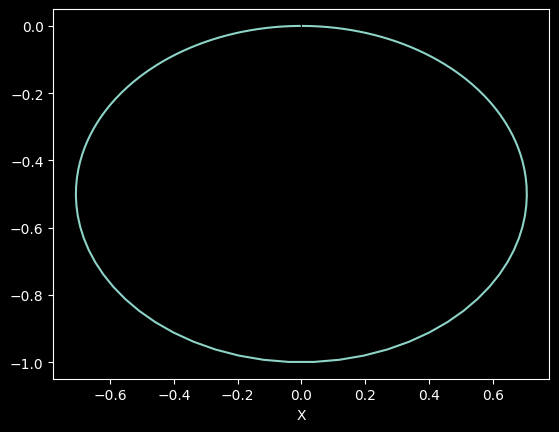

In [76]:
#Let K = alpha/gamma
K = np.linspace(-100,100,10000)

x = []
z = []

for k in K:
    x.append( ( -4 * k ) / ( 1 + 8*k*k ) )
    z.append( ( -1 ) / ( 1 + 8*k*k ) )

plt.plot(x,z)
plt.show()


##### Figure 3
Plot of the optimal driving required to produce a pure state with Bloch angle $ \theta $ where

$$
\lambda = -\frac{\sqrt{\gamma}}{2}( 1 + \cos\theta ) \hspace{10 bp} , \hspace{10 bp} \alpha = \frac{\gamma}{4}\sin\theta\cos\theta.

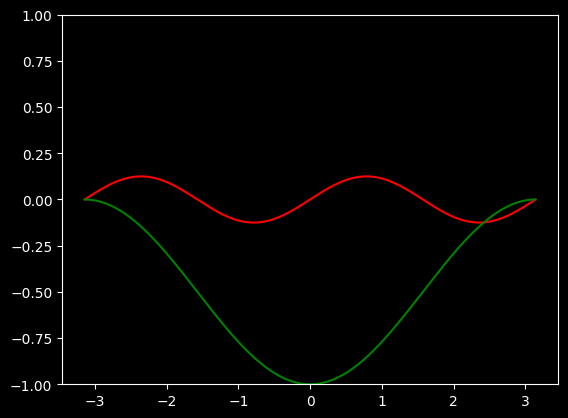

In [9]:
#Gamma is set to one for dimensionless alpha and lambda
gamma = 1
theta = np.linspace(-np.pi,np.pi,1000)

lambd = {}
alpha = {}

for a in theta:
    lambd[a] = - np.sqrt(gamma) * 0.5 * ( 1 + np.cos(a))
    alpha[a] = gamma * 0.25 * np.sin(a) * np.cos(a) 

ax = plt.gca()
ax.set_ylim([-1, 1])

plt.plot(*zip(*sorted(alpha.items())),'r')
plt.plot(*zip(*sorted(lambd.items())),'g')
plt.show()

In [4]:
def maximise(l,x,n):
    g = 1
    a = ( (n + 4*n*l + 4*l*l) / 4*n ) * np.tan(x)
    D = (g**2) * (n**2) + 6*(g**1.5)*(n**2)*l + 2*g*n*(3+4*n)*(l**2) + 16*sqrt(g)*n*(l**3) + 8*((a**2) * (n**2) + (l**4))
    X = (-4*a*(n**2)*(g+2*sqrt(g)*l))/D
    Z = (-sqrt(g)*n*(sqrt(g) + 2*l)*(g*n +4*sqrt(g)*n*l + 4*l*l))/D
    return -( X*X + Z*Z )

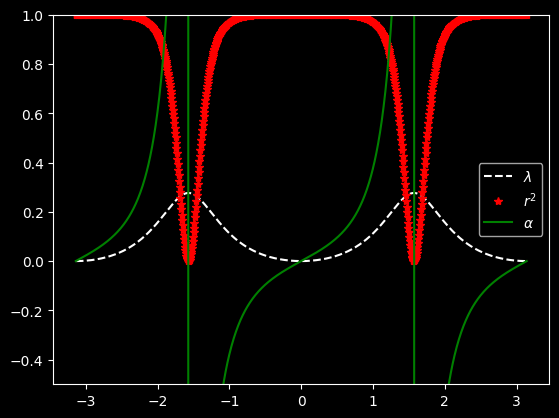

In [75]:
from scipy.optimize import minimize_scalar

p = []
z = []
A = {}
L = {}
R2 = {}

ax = plt.gca()
ax.set_ylim([-0.5, 1])

eta = [0.8]
g = 1

for n in eta:
    for x in theta:
        result = minimize_scalar(maximise, args=(x,n))
        l = -result.x
        L[x] = l
        R2[x] = -result.fun
        A[x] = ( (n + 4*n*l + 4*l*l) / 4*n ) * np.tan(x)

        # if (x < np.pi/2 and x > -np.pi/2):
        #     l = l-1
        # else:
        #     l = -l

    plt.plot(*zip(*sorted(L.items())),'w--')
    plt.plot(*zip(*sorted(R2.items())),'r*')
    plt.plot(*zip(*sorted(A.items())),'g')

plt.legend([r"$\lambda$", r"$r^2$", r"$\alpha$"], loc='center right')
plt.show()  

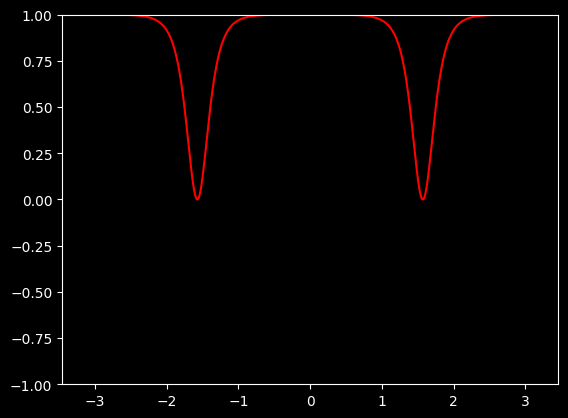

In [ ]:
from scipy.optimize import minimize_scalar

p = []
z = []
A = {}

ax = plt.gca()
ax.set_ylim([-1, 1])

eta = [0.8]
g = 1

for n in eta:
    for x in theta:
        result = minimize_scalar(maximise, args=(x,n))
        l = -result.fun
        a = ( (n + 4*n*l + 4*l*l) / 4*n ) * np.tan(x)
        # D = (g**2) * (n**2) + 6*(g**1.5)*(n**2)*l + 2*g*n*(3+4*n)*(l**2) + 16*sqrt(g)*n*(l**3) + 8*((a**2) * (n**2) + (l**4))
        # p.append((-4*a*(n**2)*(g+2*sqrt(g)*l))/D)
        # z.append((-sqrt(g)*n*(sqrt(g) + 2*l)*(g*n +4*sqrt(g)*n*l + 4*l*l))/D)
        A[x] = l

    # plt.plot(p,z)
    plt.plot(*zip(*sorted(A.items())),'r')
    p.clear()
    z.clear()
plt.show()  